<a href="https://colab.research.google.com/github/anushasiddham2002/anu1/blob/main/ANN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
train_images,test_images=train_images/255.0,test_images/255.0
class_names=['A','Au','B','C','D','DO','F','H','S','T']

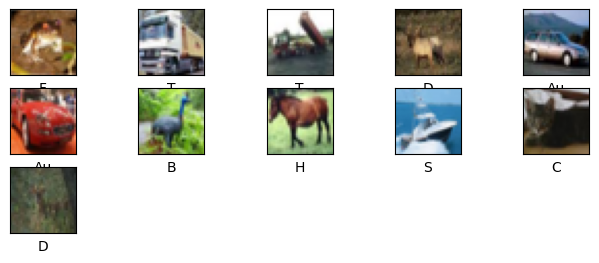

In [4]:

plt.figure(figsize=(8,6))
for i in range(11):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5476 - accuracy: 0.4359 - val_loss: 1.2907 - val_accuracy: 0.5323
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1817 - accuracy: 0.5815 - val_loss: 1.1286 - val_accuracy: 0.6078
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0323 - accuracy: 0.6348 - val_loss: 1.0449 - val_accuracy: 0.6265
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9421 - accuracy: 0.6675 - val_loss: 0.9793 - val_accuracy: 0.6617
Epoch 5/5
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8720 - accuracy: 0.6948 - val_loss: 0.9096 - val_accuracy: 0.6811
313/313 - 4s - loss: 0.9096 - accuracy: 0.6811 - 4s/epoch - 12ms/step
0.6811000108718872


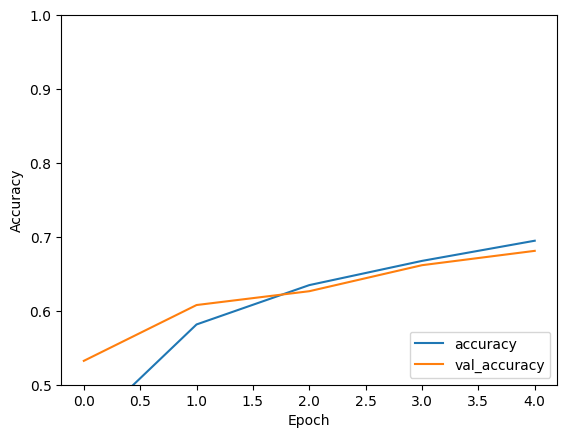

In [6]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)